# Aula 004 - Data Viz
___

A visualização de dados é o processo de demonstrar e resumir dados de forma visual. É um trabalho imprescindível para o cientista de dados e nos dá a possibilidade de explicar melhor os insights que tivemos para outros profissionais. Além disso, analisar visualmente os dados nos entrega, muitas vezes, mais informações do que utilizar somente medidas estatísticas.

In [ ]:
from src.minhas_funcs import plot_ascombe
plot_ascombe()

Existem várias bibliotecas de visualização de dados em python, porém usaremos somente duas.

![](https://www.anaconda.com/wp-content/uploads/2019/01/PythonVisLandscape.jpg)

# Matplotlib
___

O matplotlib é umas das principais ferramentas de visualização de dados e tem como seu principal ponto positivo a capacidade que ela nos dá de personalização das visualizações. Por todo o curso usaremos a interface ```.pyplot``` do matplotlib, que nos dá uma forma rápida e simples de gerar gráficos, mas ele possui outras interfaces mais complexas e avançadas.

In [ ]:
## importando o matplotlib
import matplotlib.pyplot as plt

## importando o pandas
import pandas as pd

## importando o numpy
import numpy as np

## warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
carros = pd.read_csv('data/carros.csv')
print(carros.shape)
carros.head()

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

## .subplots()

O ```.subplots()``` quando utilizado sem nenhum parâmetro retorna dois objetos, o primeiro é a figura e nela os gráficos serão adicionados (como se fosse um container) e o segundo objeto são os axes onde desenharemos os nosso gráficos.

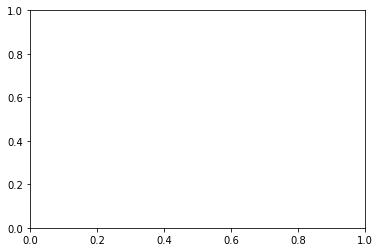

In [27]:
f,ax = plt.subplots()

In [28]:
type(f)

matplotlib.figure.Figure

In [29]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [30]:
carros_mileage = (
    carros[['mileage','year']]
    .groupby('year')
    .mean()
)

carros_mileage

,mileage
year,
1970,37357.000000
1997,89233.000000
2001,102000.000000
2002,74768.400000
2003,61035.000000
2004,60507.142857
2005,93625.000000
2006,78402.363636
2007,87377.888889


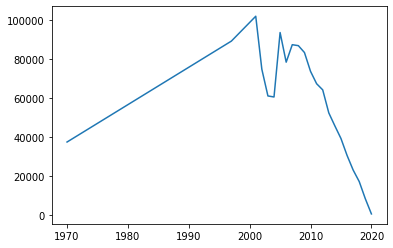

In [33]:
f,ax = plt.subplots()

ax.plot(carros_mileage)

plt.show()

O método .plot adiciona um plot de linhas na figura, onde o eixo X representa os anos e o eixo Y representa a média dos valores dos carros a cada ano. Mas e se quisermos dividir em grupos de carro de acordo com a transmissão?

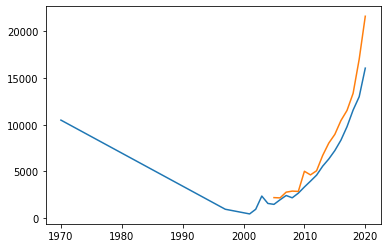

In [39]:
## carros manuais
data_plot1 = (
    carros[['transmission','year','price']]
    .query("transmission == 'Manual'")
    .groupby('year')
    .mean()   
)

## carros automáticos
data_plot2 = (
    carros[['transmission','year','price']]
    .query("transmission == 'Automatic'")
    .groupby('year')
    .mean()   
)

f, ax = plt.subplots()
ax.plot(data_plot1)
ax.plot(data_plot2)
plt.show()

Podemos customizar nosso gráfico, mudar o nome, a forma que os dados são mostrados, intervalos, cores, marcadores e legendas. Vamos adicionar marcadores ao nosso gráfico acima.

In [42]:
data_plot1

,price
year,
1970,10495.000000
1997,950.000000
2001,450.000000
2002,946.250000
2003,2362.600000
2004,1570.833333
2005,1473.571429
2006,1963.250000
2007,2422.045455


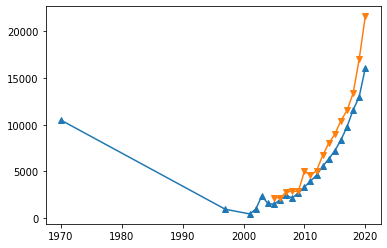

In [46]:
f, ax = plt.subplots()

# ## adicionando marcadores
ax.plot(data_plot1,marker="^")
# ## adicionando marcadores
ax.plot(data_plot2,marker="v")

plt.show()

A lista de possívies marcadores está em [documentação](https://matplotlib.org/stable/api/markers_api.html). Marcadores são importante em gráficos de linhas para sabermos quais onde os dados estão de fato quando tratamos dados discretos. No exemplo acima não existem dados para o ano de 1980 ou 1990 temos somente 1970 e o próximo ponto nos dados é 1997. Também é possível mudar o estilo da linha com o parâmetro linestyle.

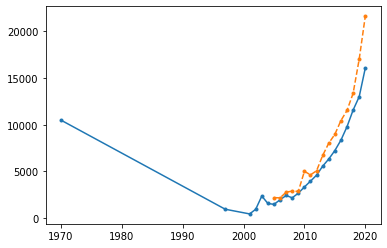

In [51]:
f, ax = plt.subplots()

ax.plot(data_plot1,marker='.')
# ## adicionando linhas pontilhadas
ax.plot(data_plot2,marker='.',linestyle='--')

# plt.show()

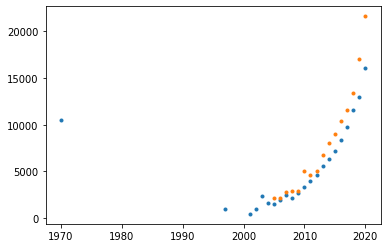

In [62]:
f, ax = plt.subplots()

## removendo as linhas
ax.plot(data_plot1,marker='.',linestyle="")
# ## removendo as linhas
ax.plot(data_plot2,marker='.',linestyle="")

plt.show()

A lista de possívies estilos de linha está em [documentação](https://matplotlib.org/2.0.2/api/lines_api.html). Finalmente podemos trocar as cores associadas aos dados.

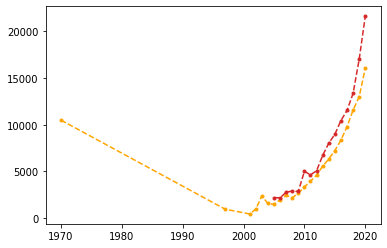

In [66]:
f, ax = plt.subplots()

## alterando cores
ax.plot(data_plot1,marker='.',linestyle="--",color='orange')
## alterando cores
ax.plot(data_plot2,marker='.',linestyle="--",color='tab:red')

plt.show()

A lista de cores está em [documentação](https://matplotlib.org/stable/gallery/color/named_colors.html). O nome dos eixos demonstram o que cada eixo representa e deixa o gráfico mais legível para o usuário.

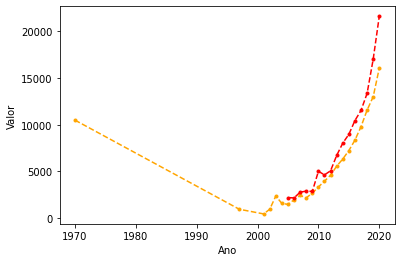

In [77]:
f, ax = plt.subplots()

## plots
ax.plot(data_plot1,marker='.',linestyle="--",color='orange')
ax.plot(data_plot2,marker='.',linestyle="--",color='red')

## mudando os eixos
ax.set_xlabel('Ano')
ax.set_ylabel('Valor')

plt.show()

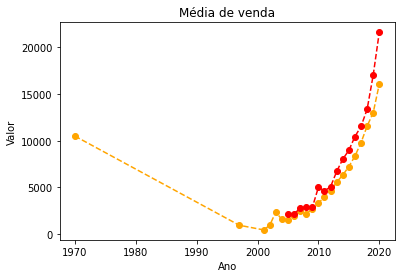

In [78]:
f, ax = plt.subplots()

## plots
ax.plot(data_plot1,marker='o',linestyle="--",color='orange')
ax.plot(data_plot2,marker='o',linestyle="--",color='red')

## mudando os eixos
ax.set_xlabel('Ano')
ax.set_ylabel('Valor')

## adicionando título
ax.set_title('Média de venda')

plt.show()

Vamos criar um gráfico com o valor médio de venda de cada ano e também os valores do primeiro e terceiro quartil.

In [81]:
def percent25(x):
    return np.percentile(x,25)

def percent75(x):
    return np.percentile(x,75)

data_plot = (
    carros[['year','price']]
    .groupby('year')
    .agg({'price':['mean',percent25,percent75]})
    .droplevel(0,axis=1)
)
data_plot.head()

,mean,percent25,percent75
year,,,
1970,10495.0,10495.0,10495.0
1997,950.0,950.0,950.0
2001,1169.0,809.5,1528.5
2002,1057.0,700.0,1495.0
2003,2362.6,590.0,2499.0


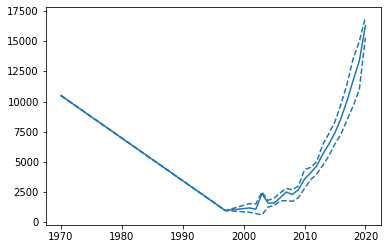

In [84]:
f, ax = plt.subplots()

## plots
ax.plot(data_plot['mean'],color='tab:blue')
ax.plot(data_plot['percent25'],color='tab:blue',ls='--')
ax.plot(data_plot['percent75'],color='tab:blue',ls='--')

plt.show()

Vamos fazer isso agora para transmissão.

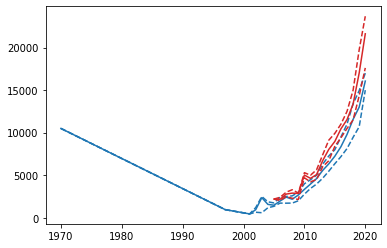

In [85]:
f, ax = plt.subplots()

for i in carros.transmission.unique()[:2]:
    data_plot = (
        carros[['year','price','transmission']]
        .query("transmission == @i")
        .groupby('year')
        .agg({'price':['mean',percent25,percent75]})
        .droplevel(0,axis=1)
    )
    
    if i == 'Automatic':
        ax.plot(data_plot['mean'],color='tab:red')
        ax.plot(data_plot['percent25'],color='tab:red',ls='--')
        ax.plot(data_plot['percent75'],color='tab:red',ls='--')
    else:
        ax.plot(data_plot['mean'],color='tab:blue')
        ax.plot(data_plot['percent25'],color='tab:blue',ls='--')
        ax.plot(data_plot['percent75'],color='tab:blue',ls='--')

plt.show()

Para evitar plotar várias informações no mesmo gráfico e torná-lo ilegível, usamos a regra dos pequenos múltiplos que nos diz que é melhor plotar pequenos múltiplos gráficos com informações diferentes do que o mesmo com várias informações. A função subplots serve para montarmos esse pequenos múltiplos.

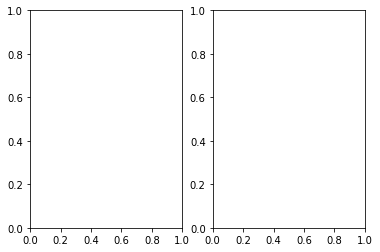

In [92]:
f, ax = plt.subplots(1,2)

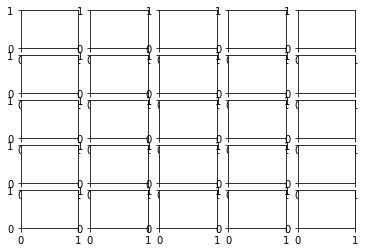

In [90]:
f,ax = plt.subplots(5,5)

In [94]:
type(ax)

numpy.ndarray

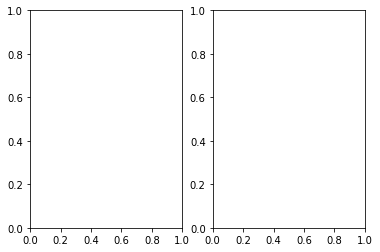

In [96]:
f, ax = plt.subplots(1,2)

In [101]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

Veja que agora temos dois axes e estão referenciados dentro um array, logo para selecionar cada um deles basta indexar o array de forma adequada.

In [103]:
data_plot_manual = (
        carros[['year','price','transmission']]
        .query("transmission == 'Manual'")
        .groupby('year')
        .agg({'price':['mean',percent25,percent75]})
        .droplevel(0,axis=1)
    )

data_plot_automatic = (
        carros[['year','price','transmission']]
        .query("transmission == 'Automatic'")
        .groupby('year')
        .agg({'price':['mean',percent25,percent75]})
        .droplevel(0,axis=1)
    )

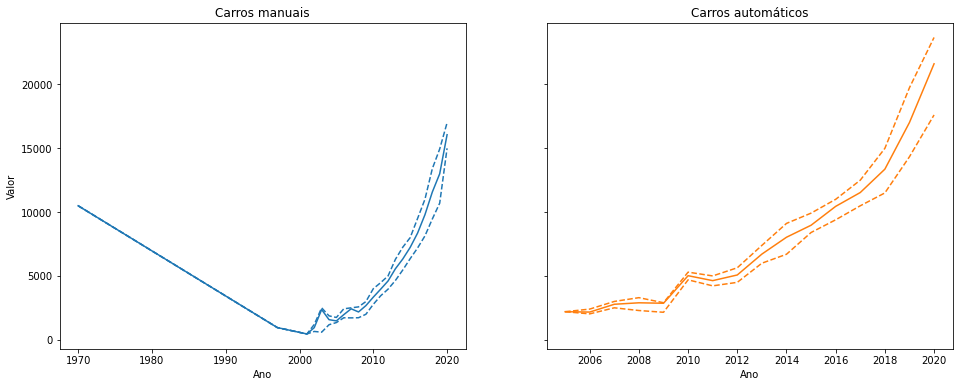

In [127]:
f, ax = plt.subplots(1,2,sharey=True,figsize=(16,6))

ax[0].plot(data_plot_manual['mean'],color='tab:blue')
ax[1].plot(data_plot_automatic['mean'],color='tab:orange')

ax[0].plot(data_plot_manual['percent25'],color='tab:blue',ls='--')
ax[0].plot(data_plot_manual['percent75'],color='tab:blue',ls='--')

ax[1].plot(data_plot_automatic['percent25'],color='tab:orange',ls='--')
ax[1].plot(data_plot_automatic['percent75'],color='tab:orange',ls='--')

ax[0].set_xlabel('Ano')
ax[1].set_xlabel('Ano')
ax[0].set_ylabel('Valor')

ax[0].set_title('Carros manuais')
ax[1].set_title('Carros automáticos')

plt.show()

Text(0.5, 0, 'Anos')

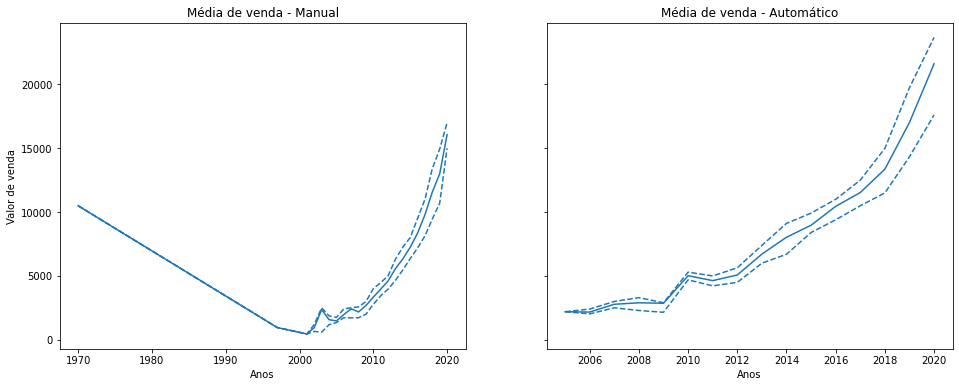

In [128]:
f, ax = plt.subplots(1,2,figsize=(16,6),sharey=True)

ax[0].plot(data_plot_manual['mean'],color='tab:blue')
ax[0].plot(data_plot_manual['percent25'],color='tab:blue',ls='--')
ax[0].plot(data_plot_manual['percent75'],color='tab:blue',ls='--')
ax[0].set_title('Média de venda - Manual')
ax[0].set_xlabel('Anos')
ax[0].set_ylabel('Valor de venda')

ax[1].plot(data_plot_automatic['mean'],color='tab:blue')
ax[1].plot(data_plot_automatic['percent25'],color='tab:blue',ls='--')
ax[1].plot(data_plot_automatic['percent75'],color='tab:blue',ls='--')
ax[1].set_title('Média de venda - Automático')
ax[1].set_xlabel('Anos')

Vamos plotar um gráfico demonstrando a soma cumulativa de vendas de dois carros para entendermos melhor a velocidade de venda deles.

In [132]:
carros.model.value_counts().nlargest()

 Corsa       3441
 Astra       2805
 Mokka X     2127
 Insignia    1030
 Mokka        815
Name: model, dtype: int64

In [135]:
carros[carros.model == ' Mokka X']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7509,Mokka X,2019,12900,Manual,7898,Petrol,145,39.2,1.4
7510,Mokka X,2019,14200,Automatic,19917,Petrol,145,37.2,1.4
7511,Mokka X,2019,13200,Manual,11682,Petrol,145,39.2,1.4
7512,Mokka X,2017,9490,Manual,28000,Petrol,145,47.1,1.4
7513,Mokka X,2019,14400,Manual,50,Petrol,150,39.2,1.4
...,...,...,...,...,...,...,...,...,...
9631,Mokka X,2016,11543,Manual,10000,Petrol,145,47.1,1.4
9632,Mokka X,2019,13098,Manual,3665,Petrol,145,39.2,1.4
9633,Mokka X,2019,13084,Manual,13551,Petrol,145,39.2,1.4
9634,Mokka X,2018,11455,Manual,10921,Petrol,145,47.1,1.4


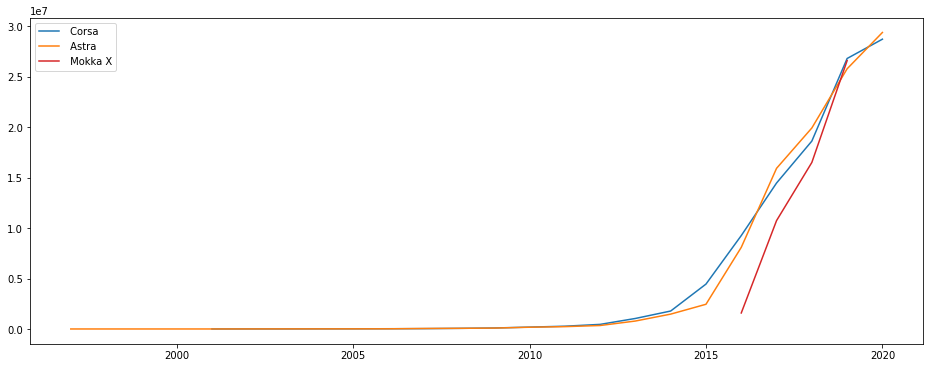

In [151]:
ls_carros = [' Corsa',' Astra',' Mokka X']
ls_cores = ['tab:blue','tab:orange','tab:red']

f, ax = plt.subplots(figsize=(16,6))

for idx in range(len(ls_carros)):

    data = (
        carros[['model','price','year']]
        .query("model == @ls_carros[@idx]")
        .groupby('year')
        .sum()
        .cumsum()
    )
    
    ax.plot(data,color=ls_cores[idx],label=ls_carros[idx])

plt.legend()
plt.show()

# Gráficos quantitativos e visualizações estatísticas

## Gráficos de barra
___

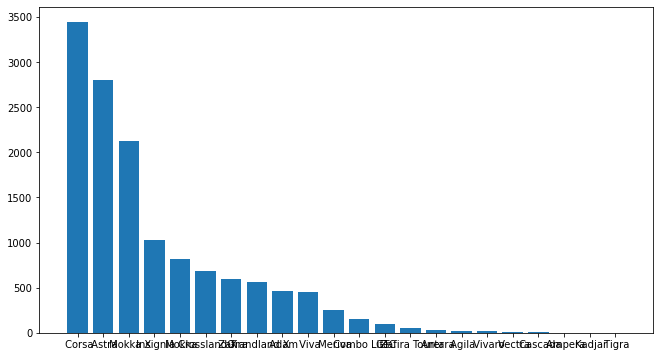

In [155]:
f,ax = plt.subplots(figsize=(11,6))

data_plot = carros.model.value_counts()
ax.bar(data_plot.index,data_plot.values)

plt.show()

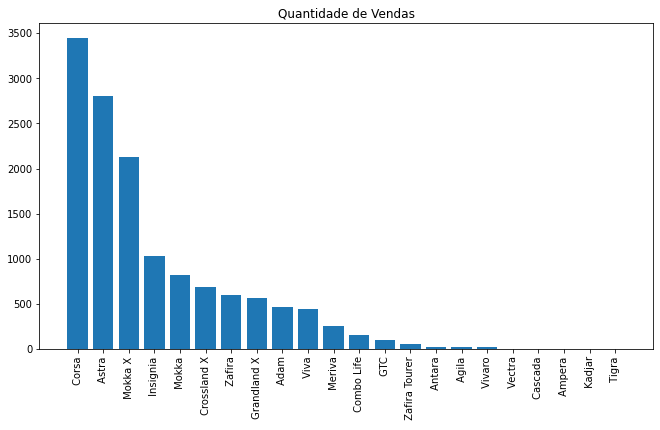

In [160]:
f,ax = plt.subplots(figsize=(11,6))

data_plot = carros.model.value_counts()

ax.bar(data_plot.index,data_plot.values)
ax.set_xticklabels(data_plot.index,rotation=90,size=10)
ax.set_title('Quantidade de Vendas')

plt.show()

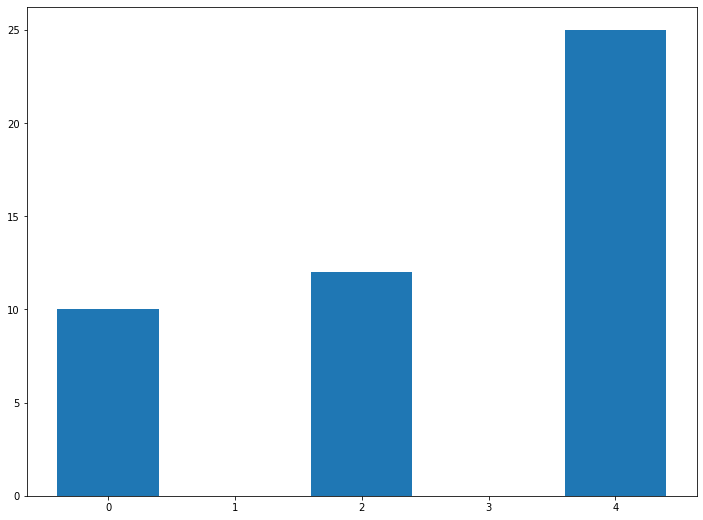

In [189]:
f,ax = plt.subplots(figsize=(12,9))

x = [0,2,4]
alturas = [10,12,25]

ax.bar(x=x,height=alturas)

plt.show()

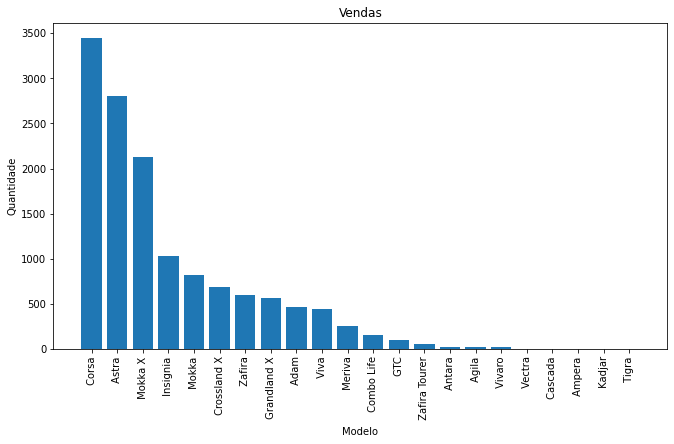

In [166]:
data_plot = carros.model.value_counts()

f,ax = plt.subplots(figsize=(11,6))

ax.bar(data_plot.index,data_plot.values)
ax.set_xticklabels(data_plot.index,rotation=90)
ax.set_xlabel('Modelo')
ax.set_ylabel('Quantidade')
ax.set_title('Vendas')

plt.show()

In [173]:
percent_vendas = (
    carros[['price','transmission']]
    .groupby('transmission')
    .sum()
    .apply(lambda x: x / x.sum())
    .sort_values('price',ascending=False)
)

In [176]:
percent_vendas.loc['Manual','price']

0.8579160615959723

In [182]:
percent_vendas

,price
transmission,
Manual,0.857916
Automatic,0.101124
Semi-Auto,0.040565
Other,0.000395


In [185]:
percent_vendas.loc['Manual','price']

0.8579160615959723

In [186]:
percent_vendas.loc['Automatic','price']

0.10112433851897416

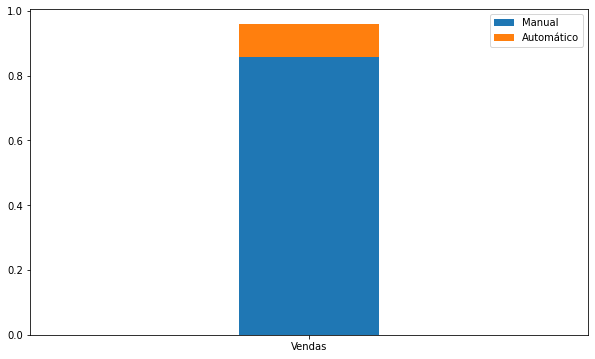

In [187]:
f,ax = plt.subplots(figsize=(10,6))

ax.bar(x='Vendas',height=percent_vendas.loc['Manual','price'],label='Manual',width=0.1)
ax.bar(x='Vendas',height=percent_vendas.loc['Automatic','price'],label='Automático',bottom=percent_vendas.loc['Manual','price'],width=0.1)
ax.set_xlim(-0.2,0.2)

plt.legend()
plt.show()

## Histogramas
___

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.


In [190]:
df = pd.read_csv('data/summer2016.csv')

In [191]:
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


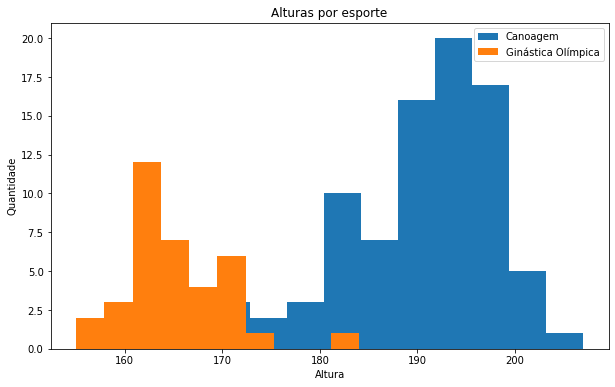

In [195]:
f,ax = plt.subplots(figsize=(10,6))

ax.hist(df.query("Sex == 'M'").query("Sport == 'Rowing'").Height,label='Canoagem')
ax.hist(df.query("Sex == 'M'").query("Sport == 'Gymnastics'").Height,label='Ginástica Olímpica')
ax.set_xlabel("Altura")
ax.set_ylabel("Quantidade")
ax.set_title("Alturas por esporte")

plt.legend()
plt.show()

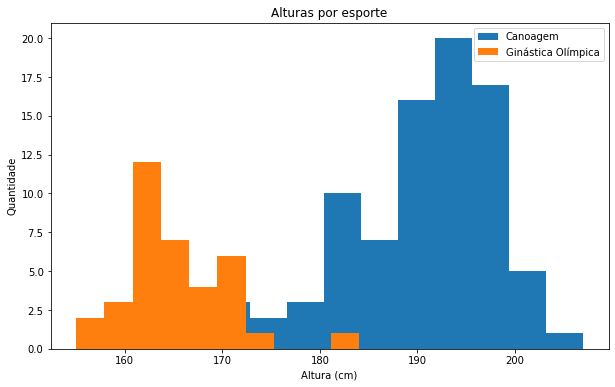

In [207]:
f,ax = plt.subplots(figsize=(10,6))

ax.hist(df.query("Sex == 'M'").query("Sport == 'Rowing'").Height,label='Canoagem')
ax.hist(df.query("Sex == 'M'").query("Sport == 'Gymnastics'").Height,label='Ginástica Olímpica')
ax.set_xlabel("Altura (cm)")
ax.set_ylabel("Quantidade")
ax.set_title("Alturas por esporte")

plt.legend()
plt.show()

## Erros
___

É possível adicionar erros aos plots para termos uma noção melhor das distribuições dos dados.

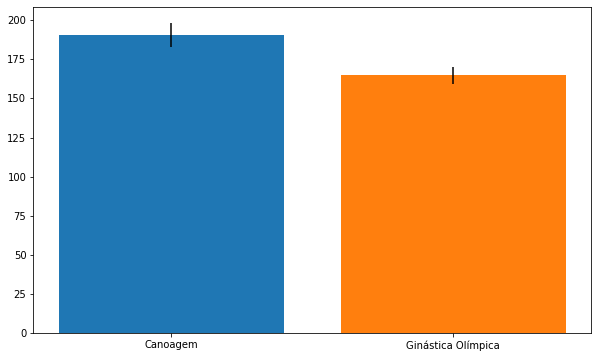

In [216]:
f,ax = plt.subplots(figsize=(10,6))

ax.bar('Canoagem',
       df.query("Sex == 'M'").query("Sport == 'Rowing'").Height.mean(),
       yerr=df.query("Sex == 'M'").query("Sport == 'Rowing'").Height.std())

ax.bar('Ginástica Olímpica',
       df.query("Sex == 'M'").query("Sport == 'Gymnastics'").Height.mean(),
       yerr=df.query("Sex == 'M'").query("Sport == 'Gymnastics'").Height.std())

plt.show()

In [217]:
data_plot_manual = (
        carros[['year','price','transmission']]
        .query("transmission == 'Manual'")
        .groupby('year')
        .agg({'price':['mean','std']})
        .droplevel(0,axis=1)
    )

data_plot_automatic = (
        carros[['year','price','transmission']]
        .query("transmission == 'Automatic'")
        .groupby('year')
        .agg({'price':['mean','std']})
        .droplevel(0,axis=1)
    )

Text(0.5, 0, 'Anos')

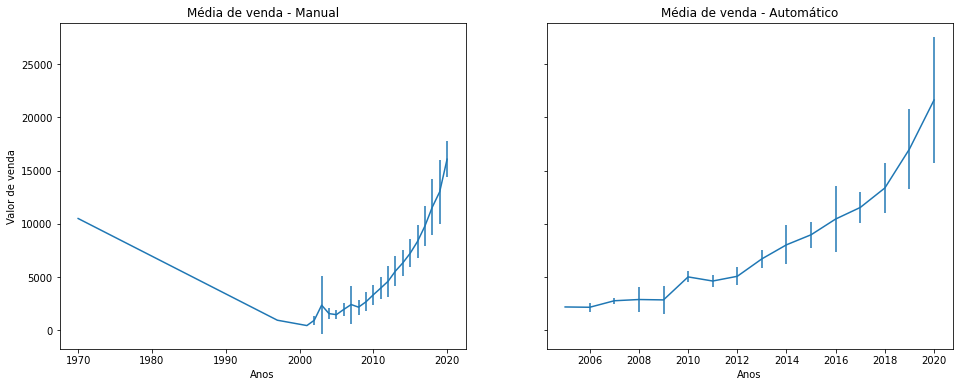

In [218]:
f, ax = plt.subplots(1,2,figsize=(16,6),sharey=True)

ax[0].errorbar(data_plot_manual.index,data_plot_manual['mean'],color='tab:blue',yerr=data_plot_manual['std'])

ax[0].set_title('Média de venda - Manual')
ax[0].set_xlabel('Anos')
ax[0].set_ylabel('Valor de venda')

ax[1].errorbar(data_plot_automatic.index,data_plot_automatic['mean'],color='tab:blue',yerr=data_plot_automatic['std'])
ax[1].set_title('Média de venda - Automático')
ax[1].set_xlabel('Anos')

## Gráficos de caixa (boxplot)
___

Um gráfico de caixa mostra a distribuição dos dados em quartis, realçando a média e os outliers. As caixas podem ter linhas estendendo-se verticalmente chamadas de limites. Essas linhas indicam variabilidade fora do quartis superiores e inferiores e qualquer ponto fora dessas linhas ou caixas estreitas é considerado um outlier.

![](https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

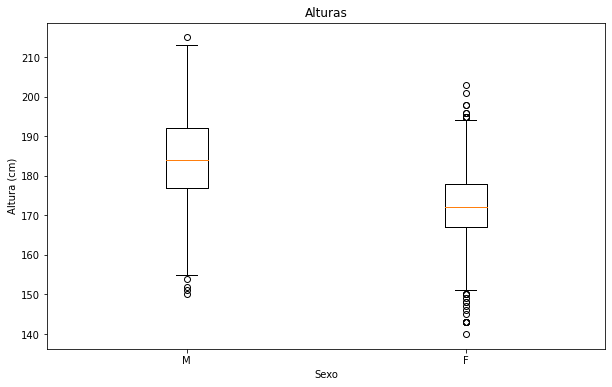

In [219]:
f,ax = plt.subplots(figsize=(10,6))

ax.boxplot(x=[df.query("Sex == 'M'").Height,df.query("Sex == 'F'").Height])
ax.set_xticklabels(labels=['M','F'])
ax.set_xlabel('Sexo')
ax.set_ylabel('Altura (cm)')
ax.set_title('Alturas')

plt.show()

177.0

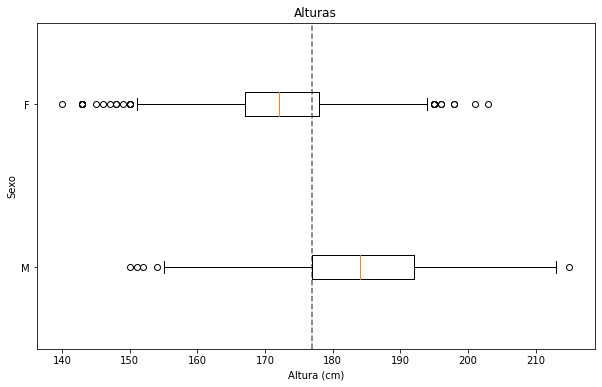

In [226]:
f,ax = plt.subplots(figsize=(10,6))

ax.boxplot(x=[df.query("Sex == 'M'").Height,df.query("Sex == 'F'").Height],vert=False)

ax.axvline(np.percentile(df.query("Sex == 'M'").Height,25),ls='--',alpha=0.6,color='black')

ax.set_yticklabels(labels=['M','F'])
ax.set_ylabel('Sexo')
ax.set_xlabel('Altura (cm)')
ax.set_title('Alturas')

plt.show()

## Gráficos de dispersão (scatter)
___

O diagrama de dispersão é um gráfico onde pontos no espaço cartesiano XY são usados para representar simultaneamente os valores de duas variáveis quantitativas medidas em cada elemento do conjunto de dados. O diagrama de dispersão é usado principalmente para visualizar a relação/associação entre duas variáveis (analise bivariada). No matplotlib utilizamos a função ```.scatter``` para criarmos gráficos de dispersão.

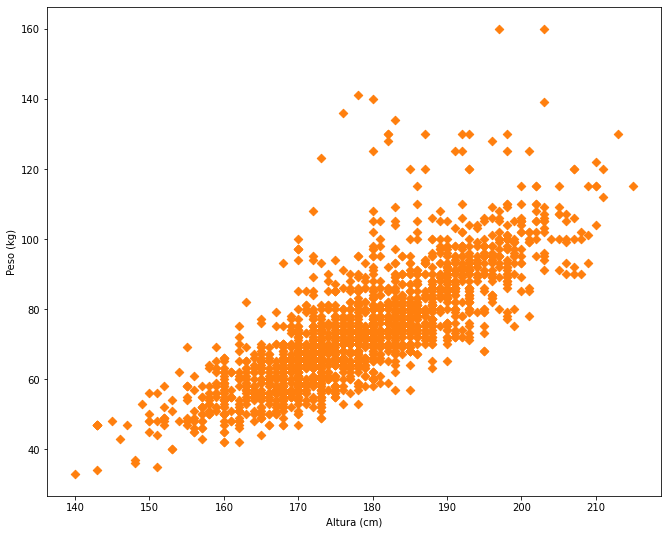

In [234]:
f, ax = plt.subplots(figsize=(11,9))

ax.scatter(x='Height',y='Weight',data=df,marker='D',color='tab:orange')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')
plt.show()

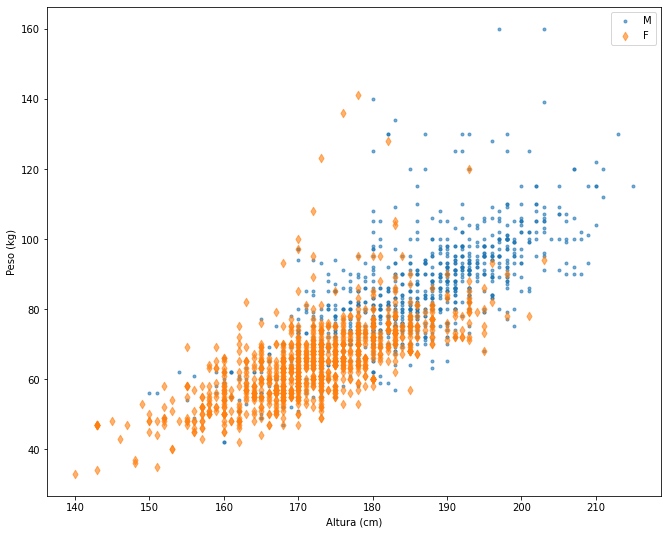

In [241]:
f, ax = plt.subplots(figsize=(11,9))

for sexo in df.Sex.unique():
    
    data = (
        df[df.Sex == sexo]
        [['Height','Weight']]
    )
    
    
    ax.scatter(x='Height',y='Weight',data=data,label=sexo,alpha=0.6,marker='.' if sexo == 'M' else 'd')

ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')
plt.legend()
plt.show()

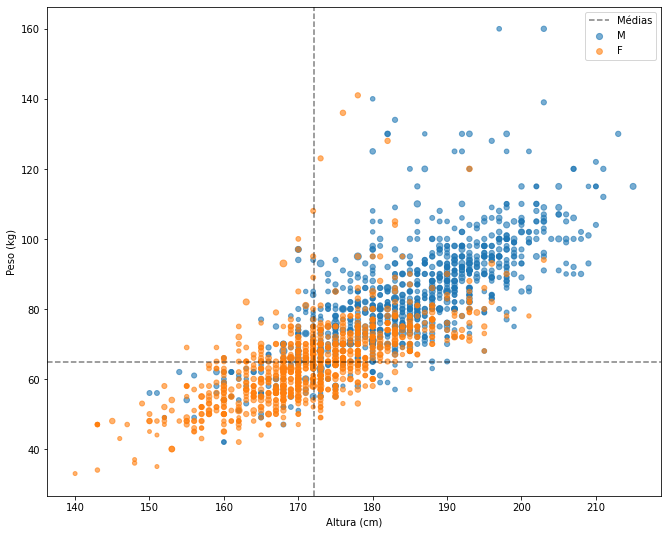

In [248]:
f, ax = plt.subplots(figsize=(11,9))

for sexo in df.Sex.unique():
    
    data = (
        df[df.Sex == sexo]
        [['Height','Weight','Age']]
    )
    
    ch = ax.scatter(x='Height',
               y='Weight',
               s='Age',
               data=data,
               label=sexo,
               alpha=0.6)

ax.axvline(data.Height.mean(),ls='--',alpha=0.5,color='black')
ax.axhline(data.Weight.mean(),ls='--',alpha=0.5,color='black',label='Médias')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')
plt.legend()
plt.show()